<a href="https://colab.research.google.com/github/T-art-coder/Python-notebooks/blob/main/Store_sales_Exploratory_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Key takeaway.s**


1.   Use **LocalOutlierFactor** for cleaning data
2.  Use Anderson test for normalcy check. **Original post omits that** and misses out one not normal feature.

[Link to original kaggle blogpost ](https://www.kaggle.com/code/georgyzubkov/store-sales-exploratory-data-analysis)




## Handy code snippets



**check for categorical and continious variables**
``` 
for column_name in train.columns:
  unique_values = len(train[column_name].unique())
  print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                            unique_values = unique_values ))
```


**Anderson test for all columns**



```
from scipy.stats import anderson
for column_name in train.columns:
  result = anderson(train[column_name])
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print("Feature '{column_name}' looks normal at sign. level of '{sl}' with p-value of '{cv}' ".format(column_name = column_name,
                                                                            sl = sl, cv = cv))
      
    else:
      print("Feature '{column_name}' doesn't look normal at sign. level of '{sl}' with p-value of '{cv}' ".format(column_name = column_name,
                                                                            sl = sl, cv = cv))
```

**Clean data from outliers with LocalOutlierFactor**

```
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(train)

train['Out']=y_pred

Out=train[train['Out']!=1]

train2=train[train['Out']==1]
```

**Plot distrubutions for data features and check for normal distrubution**.
```
for column_name in train.columns:
  plt.figure(figsize = (8,8))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density',color='green')
  sns.kdeplot(train[column_name], color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()
  ```

## Download data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv('Stores.csv')

In [3]:
train.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


### Some cleaning and describing

Let's remove store ID information.

In [4]:
train.drop(train.columns[[0]], axis = 1, inplace = True)

In [5]:
train.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [7]:
train.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


## EDA

Let's analyze the gaps in the data using msno library.


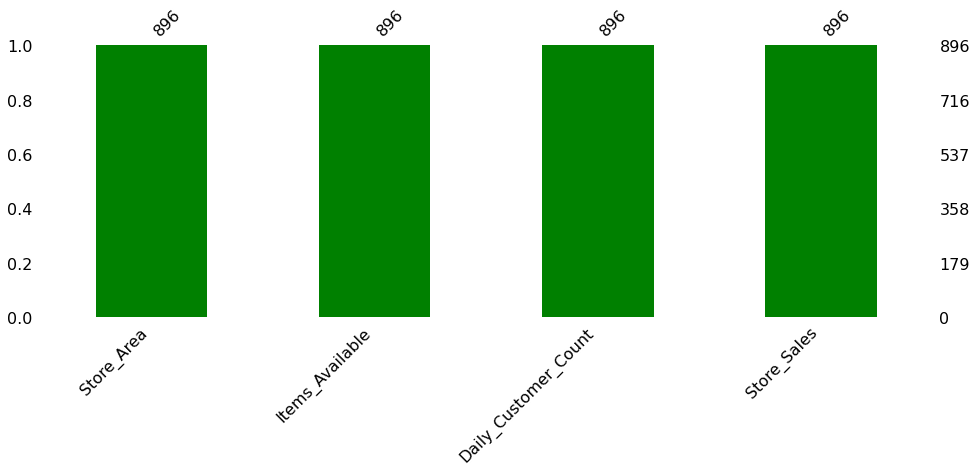

In [8]:
msno.bar(train, figsize = (16,5),color = "green")
plt.show()


No gaps in the data!

Let's check the data for the presence of categorical features.

In [9]:
for column_name in train.columns:
  unique_values = len(train[column_name].unique())
  print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                            unique_values = unique_values ))

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


No categorical features. Let's analyze the distribution of features.

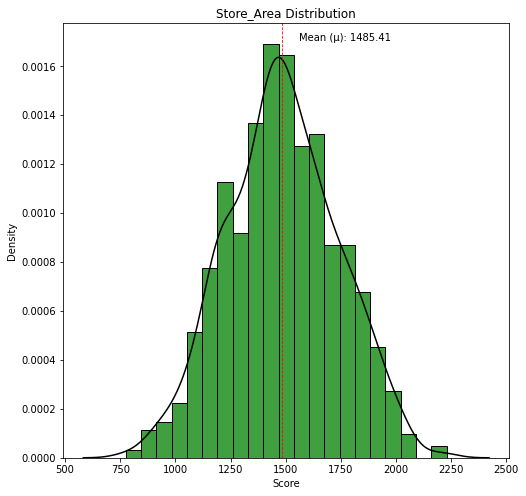

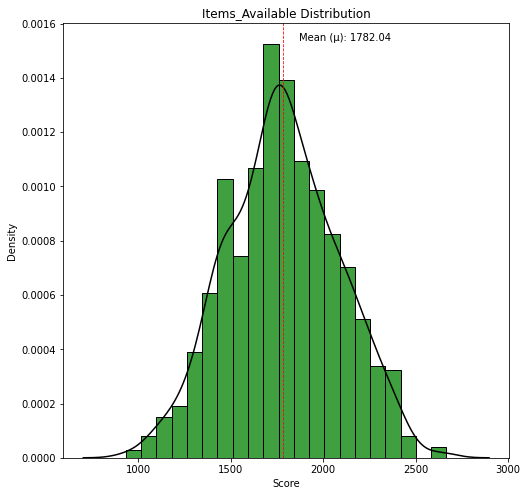

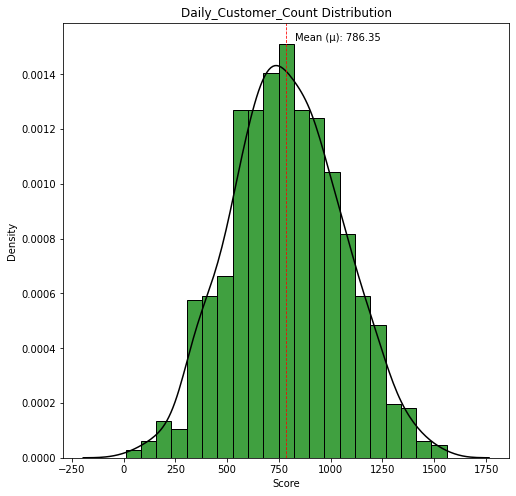

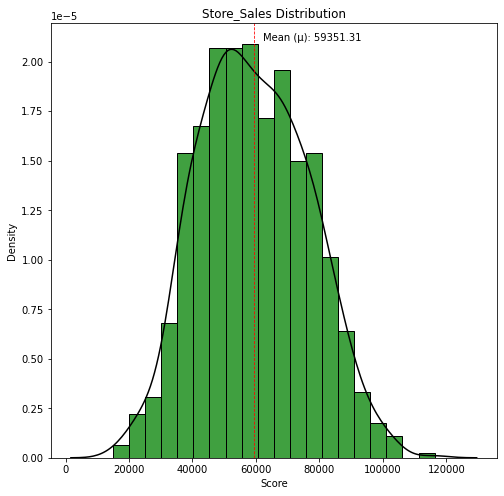

In [10]:
for column_name in train.columns:
  plt.figure(figsize = (8,8))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density',color='green')
  sns.kdeplot(train[column_name], color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

It look's like some of the features are not trully following normal distrubution. That contradicts the argument of the initial post this notebook is based on.

Let's investigate further.

In [13]:
train.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


### Anderson test for all columns

In [20]:
from scipy.stats import anderson
for column_name in train.columns:
  result = anderson(train[column_name])
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print("Feature '{column_name}' looks normal at sign. level of '{sl}' with p-value of '{cv}' ".format(column_name = column_name,
                                                                            sl = sl, cv = cv))
      
    else:
      print("Feature '{column_name}' doesn't look normal at sign. level of '{sl}' with p-value of '{cv}' ".format(column_name = column_name,
                                                                            sl = sl, cv = cv))



Feature 'Store_Area' looks normal at sign. level of '15.0' with p-value of '0.573' 
Feature 'Store_Area' looks normal at sign. level of '10.0' with p-value of '0.653' 
Feature 'Store_Area' looks normal at sign. level of '5.0' with p-value of '0.784' 
Feature 'Store_Area' looks normal at sign. level of '2.5' with p-value of '0.914' 
Feature 'Store_Area' looks normal at sign. level of '1.0' with p-value of '1.087' 
Feature 'Items_Available' doesn't look normal at sign. level of '15.0' with p-value of '0.573' 
Feature 'Items_Available' looks normal at sign. level of '10.0' with p-value of '0.653' 
Feature 'Items_Available' looks normal at sign. level of '5.0' with p-value of '0.784' 
Feature 'Items_Available' looks normal at sign. level of '2.5' with p-value of '0.914' 
Feature 'Items_Available' looks normal at sign. level of '1.0' with p-value of '1.087' 
Feature 'Daily_Customer_Count' looks normal at sign. level of '15.0' with p-value of '0.573' 
Feature 'Daily_Customer_Count' looks nor

We can draw a conclusion that feature 'Store Sales' is not normal. Though it is important in terms of testing statistical hypothesis we will return to it later.

In [24]:
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


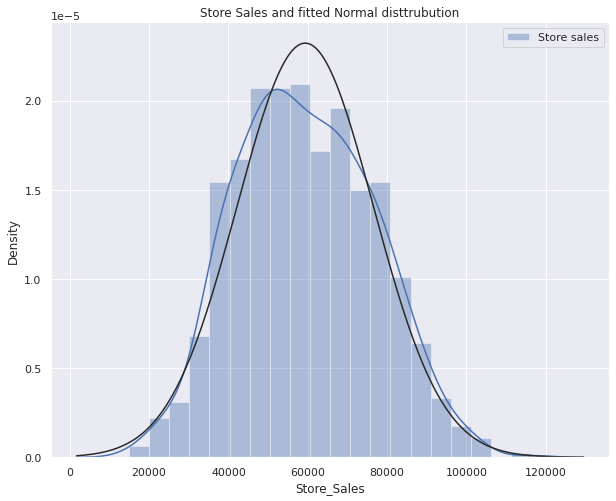

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(train['Store_Sales'], label ='Store sales', fit = stats.norm);
plt.title('Store Sales and fitted Normal disttrubution')
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


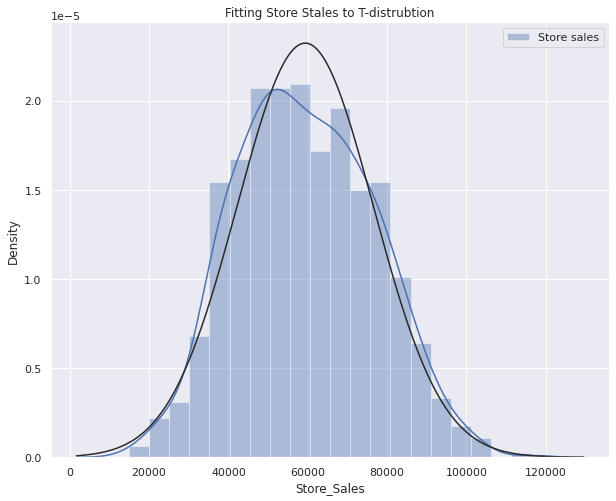

In [40]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(train['Store_Sales'], label ='Store sales', fit = stats.t);
plt.title('Fitting Store Stales to T-distrubtion');
plt.legend();

Let's look at the mutual relationship between features.

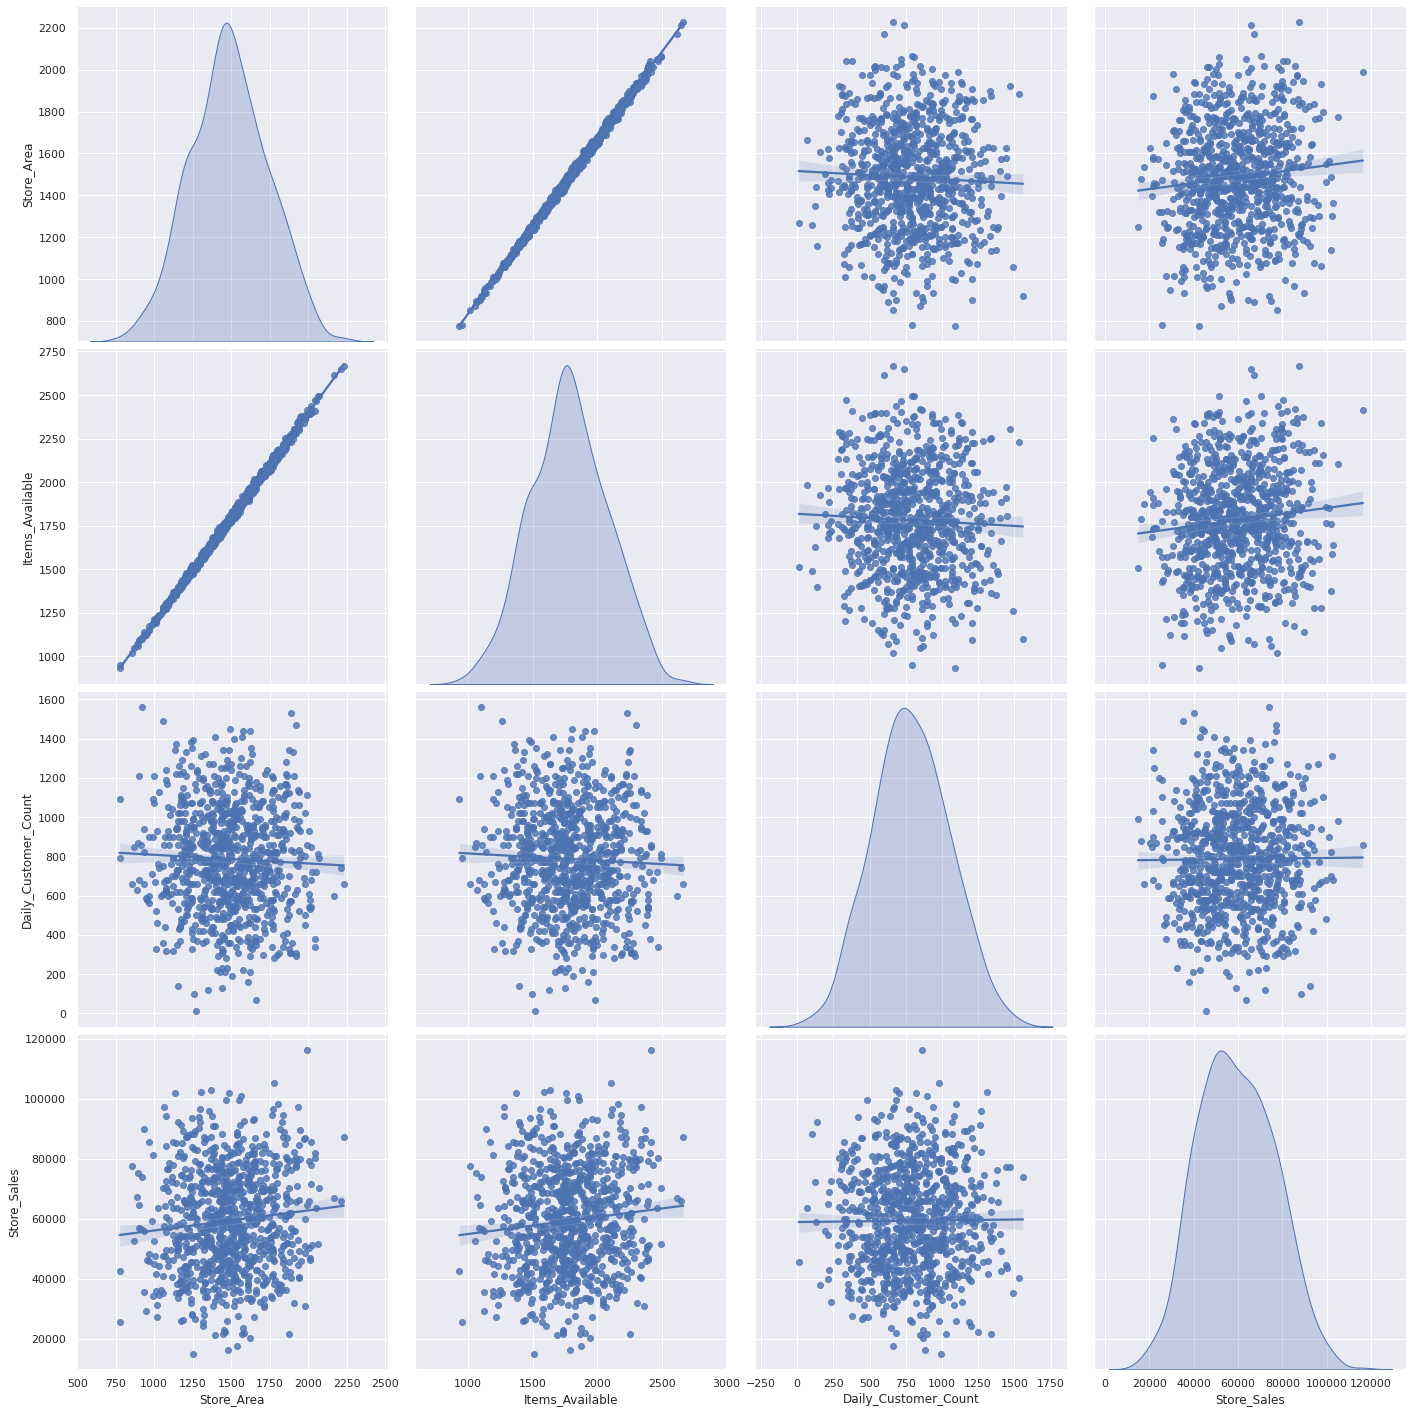

In [36]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

Let's analyze the presence of outliers in the data. According to the unspoken rule, no more than 2% of the data should be deleted (no more than 20 lines of the dataset in this case).

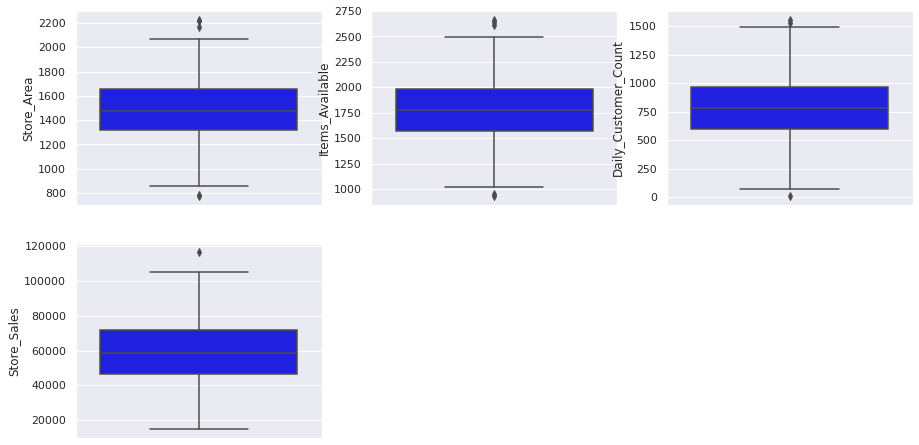

In [43]:
i=1
plt.figure(figsize=(15,25))
for feature in train.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature],color='blue')
    i+=1

Let's carry out a correlation analysis of these variables.

In [44]:
correlation = train.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



In [46]:
k = 10
cols = correlation.nlargest(k, 'Store_Sales')['Store_Sales'].index

cm = np.corrcoef(train[cols].values.T)

array([[ 1.        ,  0.09884943,  0.0974738 ,  0.00862871],
       [ 0.09884943,  1.        ,  0.99889075, -0.04097812],
       [ 0.0974738 ,  0.99889075,  1.        , -0.0414231 ],
       [ 0.00862871, -0.04097812, -0.0414231 ,  1.        ]])

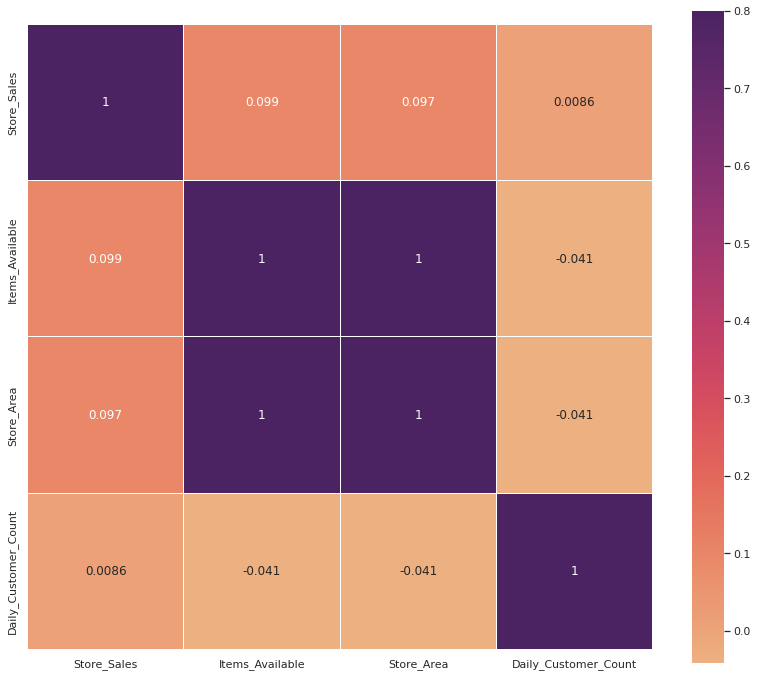

In [50]:
f, ax = plt.subplots(figsize = (14,12))

sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='flare',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

The signs of the area and the goods being sold are completely correlated, I propose to remove one of them.

In [51]:
train=train.drop('Store_Area',axis=1)
train

,Items_Available,Daily_Customer_Count,Store_Sales
0,1961,530,66490
1,1752,210,39820
2,1609,720,54010
3,1748,620,53730
4,2111,450,46620
...,...,...,...
891,1910,1080,66390
892,1663,850,82080
893,1436,1060,76440
894,1560,770,96610


## Cluster Analysis and Modelling

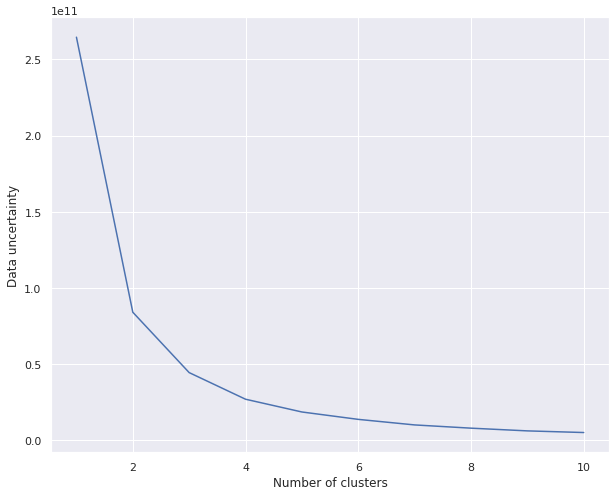

In [52]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

The optimal number of clusters is 4.

We will clean the data from outliers with the condition of removing no more than 2% of the data volume.

In [53]:
from sklearn.neighbors import LocalOutlierFactor

In [54]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(train) 

In [55]:
train['Out']=y_pred

In [56]:
Out=train[train['Out']!=1]

In [57]:
Out.shape

(20, 4)

In [58]:
train2=train[train['Out']==1]

In [59]:
train2

,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,1961,530,66490,1
1,1752,210,39820,1
2,1609,720,54010,1
3,1748,620,53730,1
4,2111,450,46620,1
...,...,...,...,...
891,1910,1080,66390,1
892,1663,850,82080,1
893,1436,1060,76440,1
894,1560,770,96610,1


Cleaning of data from outliers is done.

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [61]:
y=train2['Store_Sales']
X=train2.drop(['Store_Sales','Out'],axis=1)

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 315375186.0742271
MAE: 14783.906306818184
------------------------------ 

model: LinearRegression()
RMSE: 254003891.854681
MAE: 13228.167904160182
------------------------------ 

model: ElasticNet()
RMSE: 254003889.17001352
MAE: 13228.168461403227
------------------------------ 

model: KNeighborsRegressor()
RMSE: 299733602.9318182
MAE: 14503.147727272728
------------------------------ 

[16:08:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model: XGBRegressor()
RMSE: 273840558.53585833
MAE: 13855.08602627841
------------------------------ 

